In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':    # 맥
    rc( 'font', family='AppleGothic' )
elif platform.system() == 'Windows': # 윈도우
    fontPath = 'c:/Windows/Fonts/malgun.ttf'
    fontName = font_manager.FontProperties( fname=fontPath ).get_name()
    rc( 'font', family=fontName )
else:
    print('알수없는 시스템. 미적용')
    
pd.set_option('display.expand_frame_repr', False)
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
non_out_kospi_200_items = pd.read_excel('./non_out_data2.xlsx')

In [4]:
non_out_kospi_200_items = non_out_kospi_200_items[['종가 (5일 평균)(원)', '변동성 (5일)', '순매수수량(기관/외국인계)(20일합산)(주)',
       '순매수수량(외국인계)(20일합산)(주)', 'PER(IFRS-연결)', '순매수수량(개인)(20일합산)(주)',
       '종가 (60일 평균)(원)', '거래량 (20일 평균)(주)', '순매수수량(외국인계)(60일합산)(주)',
       '순매수수량(기관/외국인계)(60일합산)(주)', '순매수수량(외국인계)(주)', '순매수수량(기관계)(주)',
       '순매수수량(기관계)(60일합산)(주)', '순매수수량(개인)(주)', '외국인보유비중(티커)(%)',
       'PSR(IFRS-연결)', '종가 (120일 평균)(원)', '종가 (20일 평균)(원)',
       '순매수수량(개인)(60일합산)(주)', '거래량 (60일 평균)(주)', 'PCR(IFRS-연결)',
       '순매수수량(기관계)(20일합산)(주)', '수익률 (1주)(%)', 'PBR(IFRS-연결)', '거래량 (5일 평균)(주)',
       '순매수수량(기관/외국인계)(주)','종가 (5일 평균)(원)변화율',
       '변동성 (5일)변화율', '순매수수량(외국인계)(20일합산)(주)변화율', 'PER(IFRS-연결)변화율',
       '순매수수량(개인)(20일합산)(주)변화율', '종가 (60일 평균)(원)변화율', '거래량 (20일 평균)(주)변화율',
       '순매수수량(외국인계)(60일합산)(주)변화율', '순매수수량(기관/외국인계)(60일합산)(주)변화율',
       '순매수수량(외국인계)(주)변화율', '순매수수량(기관계)(주)변화율', '순매수수량(기관계)(60일합산)(주)변화율',
       '순매수수량(개인)(주)변화율', '외국인보유비중(티커)(%)변화율', 'PSR(IFRS-연결)변화율',
       '종가 (120일 평균)(원)변화율', '종가 (20일 평균)(원)변화율', '순매수수량(개인)(60일합산)(주)변화율',
       '거래량 (60일 평균)(주)변화율', 'PCR(IFRS-연결)변화율', '순매수수량(기관/외국인계)(20일합산)(주)변화율',
       '순매수수량(기관계)(20일합산)(주)변화율', '수익률 (1주)(%)변화율', 'PBR(IFRS-연결)변화율',
       '거래량 (5일 평균)(주)변화율', '순매수수량(기관/외국인계)(주)변화율', '수익률(%)(2)','Name']]

In [5]:
dataset = pd.DataFrame()
for i in list(set(non_out_kospi_200_items.Name)):
    a = non_out_kospi_200_items[non_out_kospi_200_items.Name == i]
    dataset = dataset.append(a)

In [6]:
ls = []
for i in list(set(dataset.Name)):
    if len(dataset[dataset.Name == i]) <800:
        ls.append(i)

In [7]:
for i in ls:
    dataset = dataset[dataset.Name != i]

In [8]:
def presnet_to_past(data,col):
    sets = pd.DataFrame()
    for i in list(set(data.Name)):
        sub = data[data.Name==i][col]
        present0 = sub[2:]
        pre0 = sub[:-2]
        present0.index = pre0.index
        c = present0 > pre0
        aa = pd.concat([pd.DataFrame([[0],[0]]), c])
        aa['Name']= i
        aa.index = sub.index
        sets = sets.append(aa[2:])
    sets.columns = [col,'Name']
    return sets

In [9]:
def cate_2(data,col):
    sets = pd.DataFrame()
    for i in list(set(data.Name)):
        sub = data[data.Name==i][col]
        aa = pd.DataFrame(sub >0)
        aa['Name']= i
        sets = sets.append(aa[2:])
        sets[col] = sets[col].astype(np.int)
    return sets

In [10]:
subset = pd.DataFrame()

for i in ['종가 (5일 평균)(원)', '변동성 (5일)', '순매수수량(기관/외국인계)(20일합산)(주)',
       '순매수수량(외국인계)(20일합산)(주)', 'PER(IFRS-연결)', '순매수수량(개인)(20일합산)(주)',
       '종가 (60일 평균)(원)', '거래량 (20일 평균)(주)', '순매수수량(외국인계)(60일합산)(주)',
       '순매수수량(기관/외국인계)(60일합산)(주)', '순매수수량(외국인계)(주)', '순매수수량(기관계)(주)',
       '순매수수량(기관계)(60일합산)(주)', '순매수수량(개인)(주)', '외국인보유비중(티커)(%)',
       'PSR(IFRS-연결)', '종가 (120일 평균)(원)', '종가 (20일 평균)(원)',
       '순매수수량(개인)(60일합산)(주)', '거래량 (60일 평균)(주)', 'PCR(IFRS-연결)',
       '순매수수량(기관계)(20일합산)(주)', 'PBR(IFRS-연결)', '거래량 (5일 평균)(주)',
       '순매수수량(기관/외국인계)(주)','수익률 (1주)(%)']:
    subset = pd.concat([subset,presnet_to_past(dataset,i)],axis=1)

subset2 = pd.DataFrame()
for k in ['종가 (5일 평균)(원)변화율',
       '변동성 (5일)변화율', '순매수수량(외국인계)(20일합산)(주)변화율', 'PER(IFRS-연결)변화율',
       '순매수수량(개인)(20일합산)(주)변화율', '종가 (60일 평균)(원)변화율', '거래량 (20일 평균)(주)변화율',
       '순매수수량(외국인계)(60일합산)(주)변화율', '순매수수량(기관/외국인계)(60일합산)(주)변화율',
       '순매수수량(외국인계)(주)변화율', '순매수수량(기관계)(주)변화율', '순매수수량(기관계)(60일합산)(주)변화율',
       '순매수수량(개인)(주)변화율', '외국인보유비중(티커)(%)변화율', 'PSR(IFRS-연결)변화율',
       '종가 (120일 평균)(원)변화율', '종가 (20일 평균)(원)변화율', '순매수수량(개인)(60일합산)(주)변화율',
       '거래량 (60일 평균)(주)변화율', 'PCR(IFRS-연결)변화율', '순매수수량(기관/외국인계)(20일합산)(주)변화율',
       '순매수수량(기관계)(20일합산)(주)변화율', '수익률 (1주)(%)변화율', 'PBR(IFRS-연결)변화율',
       '거래량 (5일 평균)(주)변화율', '순매수수량(기관/외국인계)(주)변화율']:
    
    subset2 = pd.concat([subset2,cate_2(dataset,k)],axis=1)
    
dataset2 = pd.concat([subset2,subset],axis=1)

In [11]:
subset3 = dataset2[['순매수수량(외국인계)(20일합산)(주)', '외국인보유비중(티커)(%)', '외국인보유비중(티커)(%)변화율',
 '변동성 (5일)', '순매수수량(외국인계)(60일합산)(주)', 'PCR(IFRS-연결)변화율', 'PBR(IFRS-연결)', '순매수수량(기관/외국인계)(주)',
 'PER(IFRS-연결)변화율', '거래량 (5일 평균)(주)', '종가 (60일 평균)(원)변화율', '종가 (20일 평균)(원)변화율', 'PER(IFRS-연결)',
 '종가 (5일 평균)(원)변화율', '종가 (5일 평균)(원)', '거래량 (60일 평균)(주)변화율', '순매수수량(기관/외국인계)(20일합산)(주)변화율',
 'PCR(IFRS-연결)', '거래량 (20일 평균)(주)변화율', '순매수수량(기관계)(20일합산)(주)변화율', '종가 (120일 평균)(원)변화율',
 '순매수수량(기관계)(60일합산)(주)변화율', '순매수수량(개인)(주)', '순매수수량(외국인계)(60일합산)(주)변화율', '거래량 (60일 평균)(주)',
 '종가 (20일 평균)(원)', '수익률 (1주)(%)', '순매수수량(개인)(20일합산)(주)', '순매수수량(개인)(60일합산)(주)변화율',
 '순매수수량(개인)(60일합산)(주)', '순매수수량(기관계)(주)변화율', '순매수수량(기관계)(60일합산)(주)', '순매수수량(외국인계)(주)',
 'PSR(IFRS-연결)변화율', '거래량 (20일 평균)(주)', '순매수수량(외국인계)(주)변화율', '순매수수량(기관계)(20일합산)(주)',
'순매수수량(기관/외국인계)(60일합산)(주)변화율', '거래량 (5일 평균)(주)변화율', '변동성 (5일)변화율',
 'PSR(IFRS-연결)', '순매수수량(외국인계)(20일합산)(주)변화율', '순매수수량(기관/외국인계)(60일합산)(주)',
 '종가 (120일 평균)(원)', 'PBR(IFRS-연결)변화율', '순매수수량(기관/외국인계)(주)변화율', '순매수수량(기관/외국인계)(20일합산)(주)',
 '종가 (60일 평균)(원)', '순매수수량(개인)(20일합산)(주)변화율', '수익률 (1주)(%)변화율', '순매수수량(개인)(주)변화율',
 '순매수수량(기관계)(주)', 'Name']]

In [12]:
subset4 = subset3.iloc[:,:53]

In [13]:
sets = pd.DataFrame()
for i in list(set(subset4.Name)):
    aa = subset4[subset4.Name == i]
    bb = dataset[dataset.Name == i]
    aa['수익률(%)(2)'] = bb['수익률(%)(2)'][2:]
    sets = sets.append(aa)

In [14]:
final_dataset = sets[sets.Name == '코웨이'][11:]

*****그래프로 확인하기

*********************한온시스템*********************


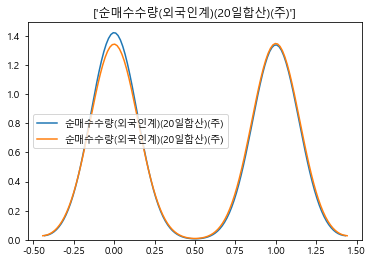

*********************한온시스템*********************


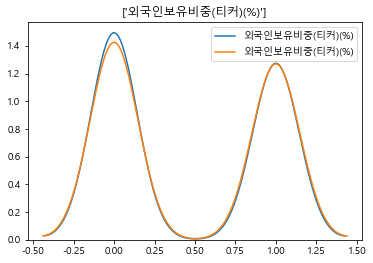

*********************한온시스템*********************


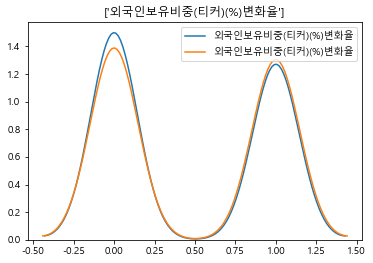

*********************한온시스템*********************


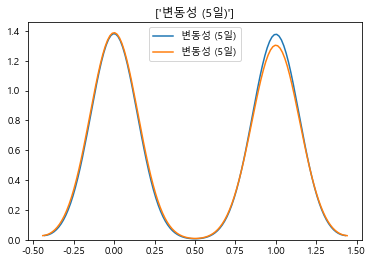

*********************한온시스템*********************


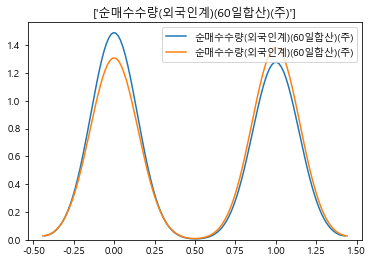

*********************한온시스템*********************


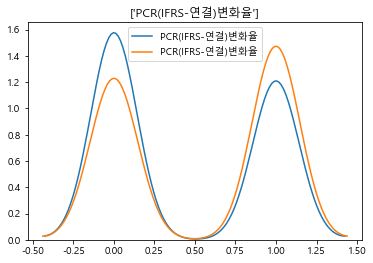

*********************한온시스템*********************


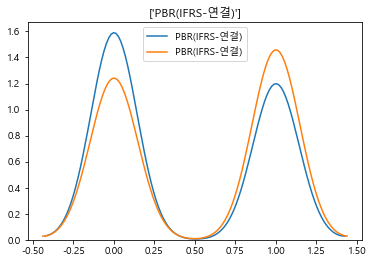

*********************한온시스템*********************


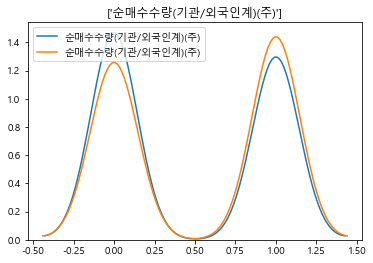

*********************한온시스템*********************


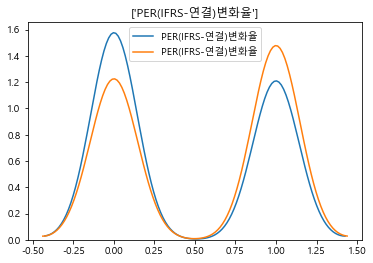

*********************한온시스템*********************


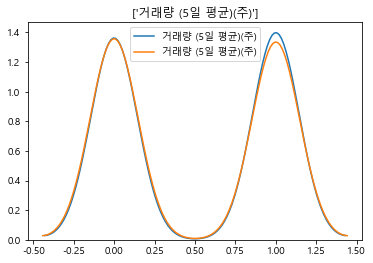

*********************한온시스템*********************


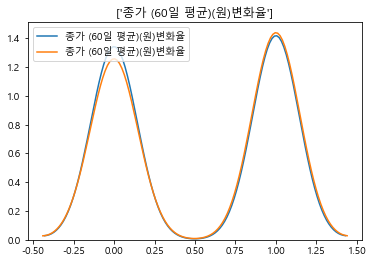

*********************한온시스템*********************


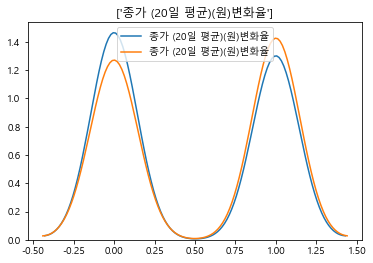

*********************한온시스템*********************


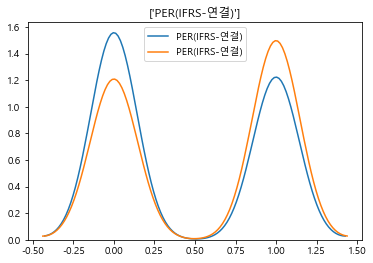

*********************한온시스템*********************


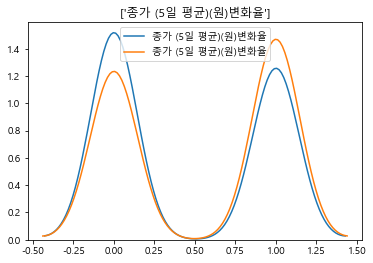

*********************한온시스템*********************


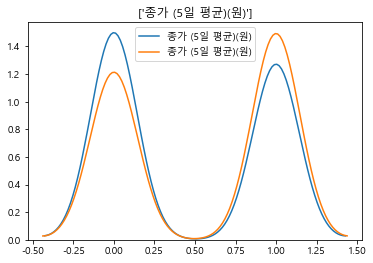

*********************한온시스템*********************


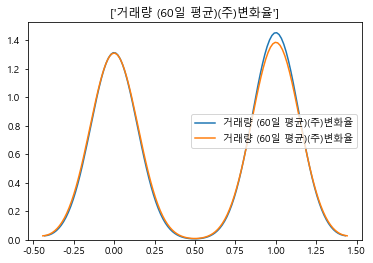

*********************한온시스템*********************


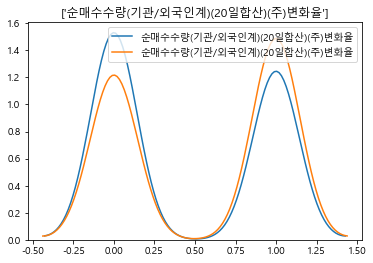

*********************한온시스템*********************


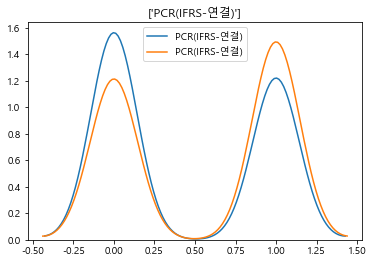

*********************한온시스템*********************


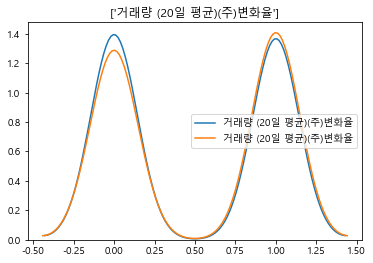

*********************한온시스템*********************


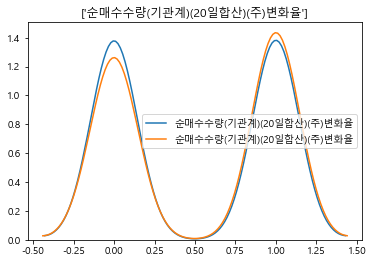

*********************한온시스템*********************


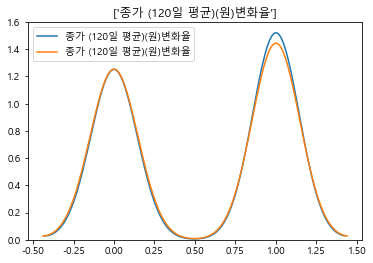

*********************한온시스템*********************


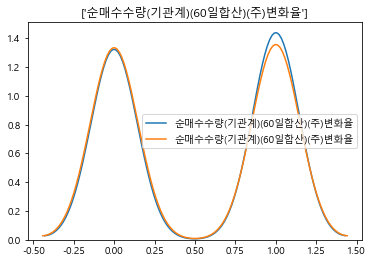

*********************한온시스템*********************


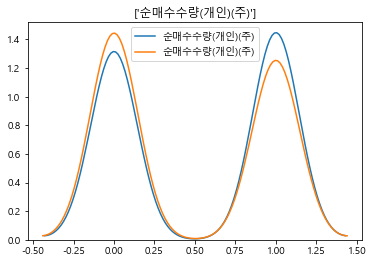

*********************한온시스템*********************


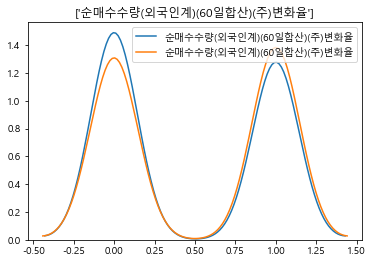

*********************한온시스템*********************


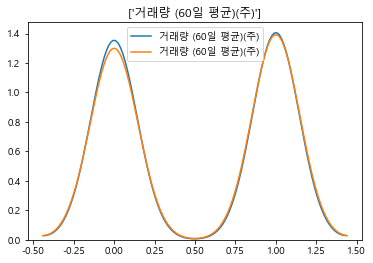

*********************한온시스템*********************


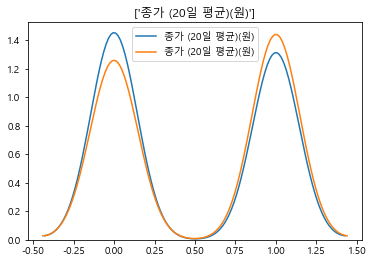

*********************한온시스템*********************


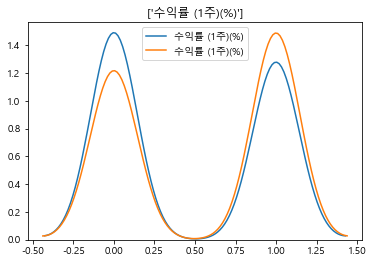

*********************한온시스템*********************


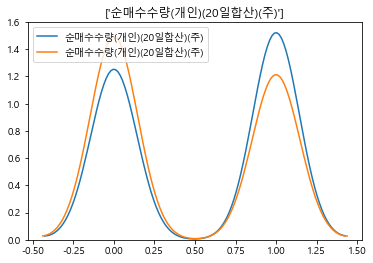

*********************한온시스템*********************


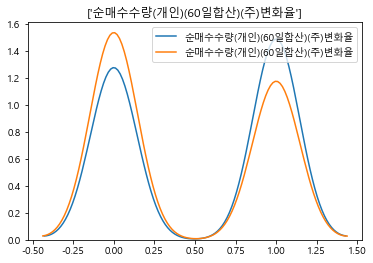

*********************한온시스템*********************


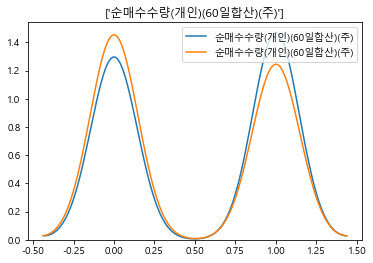

*********************한온시스템*********************


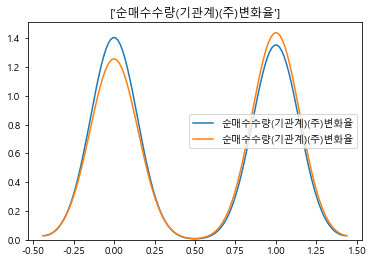

*********************한온시스템*********************


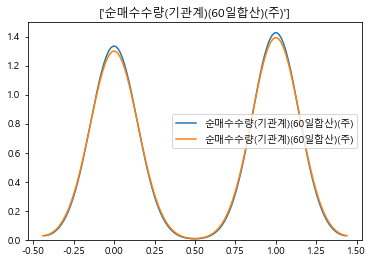

*********************한온시스템*********************


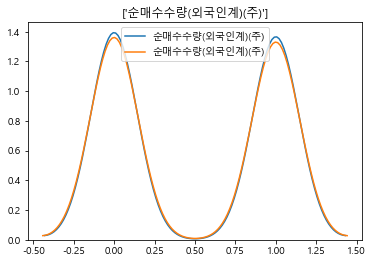

*********************한온시스템*********************


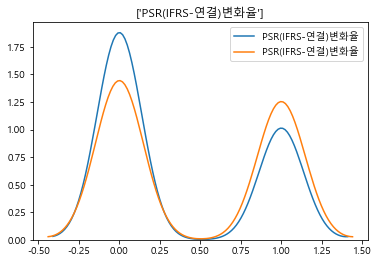

*********************한온시스템*********************


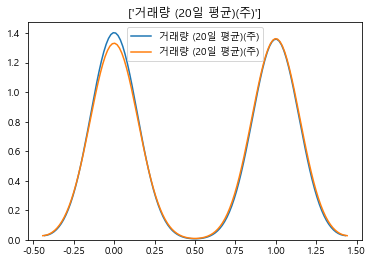

*********************한온시스템*********************


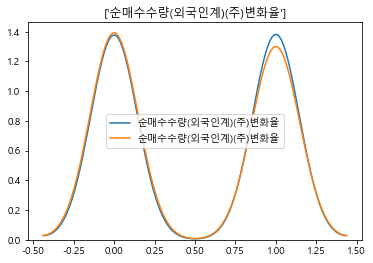

*********************한온시스템*********************


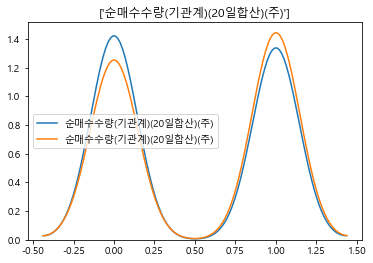

*********************한온시스템*********************


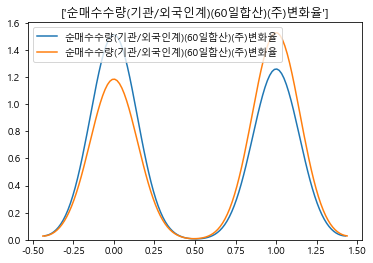

*********************한온시스템*********************


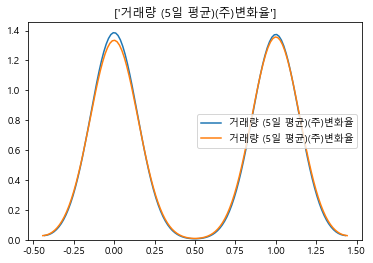

*********************한온시스템*********************


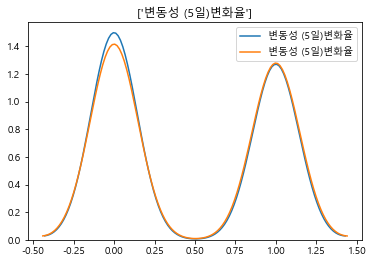

*********************한온시스템*********************


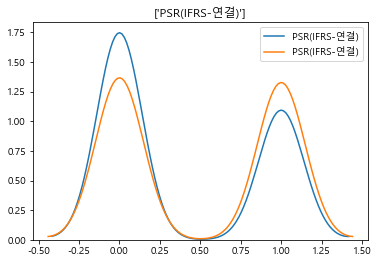

*********************한온시스템*********************


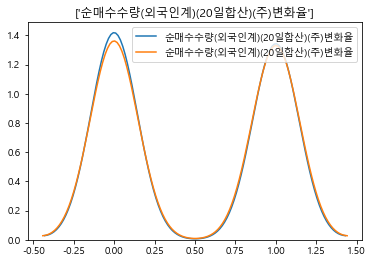

*********************한온시스템*********************


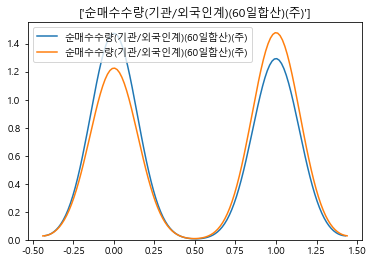

*********************한온시스템*********************


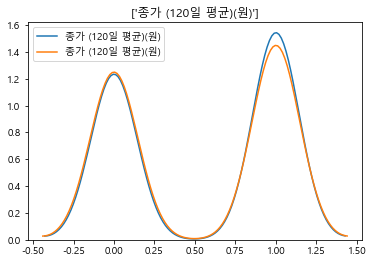

*********************한온시스템*********************


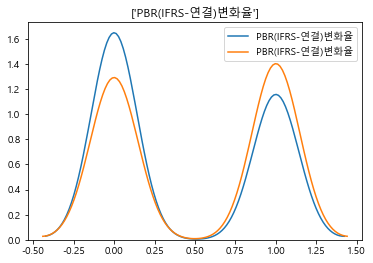

*********************한온시스템*********************


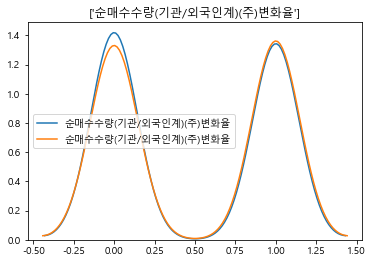

*********************한온시스템*********************


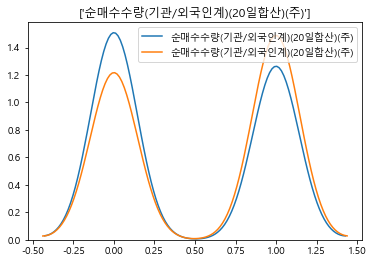

*********************한온시스템*********************


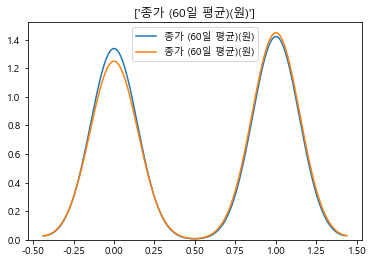

*********************한온시스템*********************


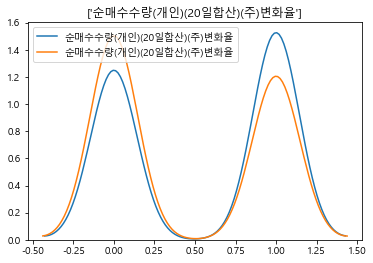

*********************한온시스템*********************


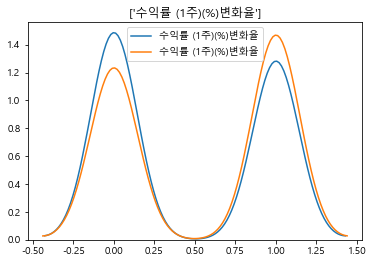

*********************한온시스템*********************


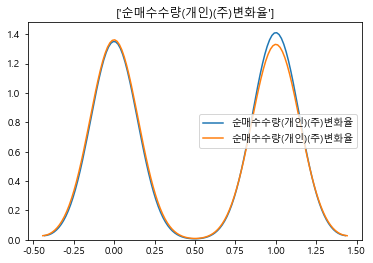

*********************한온시스템*********************


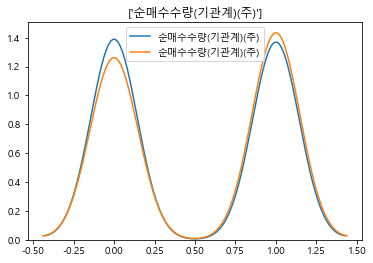

In [237]:
K=''
for i in ['순매수수량(외국인계)(20일합산)(주)','외국인보유비중(티커)(%)', '외국인보유비중(티커)(%)변화율',
 '변동성 (5일)', '순매수수량(외국인계)(60일합산)(주)', 'PCR(IFRS-연결)변화율', 'PBR(IFRS-연결)',
 '순매수수량(기관/외국인계)(주)', 'PER(IFRS-연결)변화율', '거래량 (5일 평균)(주)', '종가 (60일 평균)(원)변화율',
 '종가 (20일 평균)(원)변화율','PER(IFRS-연결)','종가 (5일 평균)(원)변화율','종가 (5일 평균)(원)',
 '거래량 (60일 평균)(주)변화율','순매수수량(기관/외국인계)(20일합산)(주)변화율','PCR(IFRS-연결)',
 '거래량 (20일 평균)(주)변화율','순매수수량(기관계)(20일합산)(주)변화율','종가 (120일 평균)(원)변화율',
 '순매수수량(기관계)(60일합산)(주)변화율', '순매수수량(개인)(주)', '순매수수량(외국인계)(60일합산)(주)변화율',
 '거래량 (60일 평균)(주)', '종가 (20일 평균)(원)', '수익률 (1주)(%)', '순매수수량(개인)(20일합산)(주)',
 '순매수수량(개인)(60일합산)(주)변화율', '순매수수량(개인)(60일합산)(주)', '순매수수량(기관계)(주)변화율',
 '순매수수량(기관계)(60일합산)(주)', '순매수수량(외국인계)(주)', 'PSR(IFRS-연결)변화율', '거래량 (20일 평균)(주)',
 '순매수수량(외국인계)(주)변화율', '순매수수량(기관계)(20일합산)(주)', '순매수수량(기관/외국인계)(60일합산)(주)변화율',
 '거래량 (5일 평균)(주)변화율', '변동성 (5일)변화율', 'PSR(IFRS-연결)', '순매수수량(외국인계)(20일합산)(주)변화율',
 '순매수수량(기관/외국인계)(60일합산)(주)', '종가 (120일 평균)(원)', 'PBR(IFRS-연결)변화율',
 '순매수수량(기관/외국인계)(주)변화율', '순매수수량(기관/외국인계)(20일합산)(주)', '종가 (60일 평균)(원)',
 '순매수수량(개인)(20일합산)(주)변화율', '수익률 (1주)(%)변화율', '순매수수량(개인)(주)변화율', '순매수수량(기관계)(주)']:
    sns.kdeplot(data=final_dataset[final_dataset['수익률(%)(2)'] == 1][i])
    sns.kdeplot(data=final_dataset[final_dataset['수익률(%)(2)'] == 0][i])
    plt.title([i])
    print('*********************{}*********************'.format(K))
    plt.show()

In [225]:
for com in list(set(sets.Name)):
    for i in ['순매수수량(외국인계)(20일합산)(주)','외국인보유비중(티커)(%)', '외국인보유비중(티커)(%)변화율',
 '변동성 (5일)', '순매수수량(외국인계)(60일합산)(주)', 'PCR(IFRS-연결)변화율', 'PBR(IFRS-연결)',
 '순매수수량(기관/외국인계)(주)', 'PER(IFRS-연결)변화율', '거래량 (5일 평균)(주)', '종가 (60일 평균)(원)변화율',
 '종가 (20일 평균)(원)변화율','PER(IFRS-연결)','종가 (5일 평균)(원)변화율','종가 (5일 평균)(원)',
 '거래량 (60일 평균)(주)변화율','순매수수량(기관/외국인계)(20일합산)(주)변화율','PCR(IFRS-연결)',
 '거래량 (20일 평균)(주)변화율','순매수수량(기관계)(20일합산)(주)변화율','종가 (120일 평균)(원)변화율',
 '순매수수량(기관계)(60일합산)(주)변화율', '순매수수량(개인)(주)', '순매수수량(외국인계)(60일합산)(주)변화율',
 '거래량 (60일 평균)(주)', '종가 (20일 평균)(원)', '수익률 (1주)(%)', '순매수수량(개인)(20일합산)(주)',
 '순매수수량(개인)(60일합산)(주)변화율', '순매수수량(개인)(60일합산)(주)', '순매수수량(기관계)(주)변화율',
 '순매수수량(기관계)(60일합산)(주)', '순매수수량(외국인계)(주)', 'PSR(IFRS-연결)변화율', '거래량 (20일 평균)(주)',
 '순매수수량(외국인계)(주)변화율', '순매수수량(기관계)(20일합산)(주)', '순매수수량(기관/외국인계)(60일합산)(주)변화율',
 '거래량 (5일 평균)(주)변화율', '변동성 (5일)변화율', 'PSR(IFRS-연결)', '순매수수량(외국인계)(20일합산)(주)변화율',
 '순매수수량(기관/외국인계)(60일합산)(주)', '종가 (120일 평균)(원)', 'PBR(IFRS-연결)변화율',
 '순매수수량(기관/외국인계)(주)변화율', '순매수수량(기관/외국인계)(20일합산)(주)', '종가 (60일 평균)(원)',
 '순매수수량(개인)(20일합산)(주)변화율', '수익률 (1주)(%)변화율', '순매수수량(개인)(주)변화율', '순매수수량(기관계)(주)']:
        sub = final_dataset[final_dataset.Name == com]
        a = (len(sub[sub['수익률(%)(2)'] == 1]) - sub[sub['수익률(%)(2)'] == 1][i].sum())/len(sub[sub['수익률(%)(2)'] == 1][i])- (len(sub[sub['수익률(%)(2)'] == 0]) - sub[sub['수익률(%)(2)'] == 0][i].sum())/len(sub[sub['수익률(%)(2)'] == 0][i])
        if abs(a) > 0.1:
            print(com,a)

LIG넥스원 -0.10134232021477124
쌍용차 -0.10929567063601953
쌍용차 0.12134219514446598
쌍용차 -0.1020031385581095
넥센타이어 0.10147470473412235
현대홈쇼핑 -0.10727150795171492
동국제강 0.10038265306122451
동국제강 0.10000000000000009
락앤락 0.10030864197530864
락앤락 0.10185185185185186
코웨이 0.11205007824726138
코웨이 0.11205007824726138
코웨이 0.10813771517996867
코웨이 0.10829420970266046
코웨이 0.10328638497652581
SK 0.11771155830753349
SK 0.10943719593100404
HDC 0.10490978518558741
HDC -0.1049097851855873
LF 0.10395572863291663
LF 0.10688893443556291
LF 0.10395572863291663
LF 0.10286260845801731
삼성중공업 0.11515589159799511
대상 0.11216467945743475
대상 0.11978175443787642
대상 0.11216467945743475
대상 0.10175676917662513
대상 0.10175676917662513
대상 0.10958455782633159
대상 0.10976837187824329
현대중공업 -0.10901647036741585
효성 0.14740315444387886
효성 0.14298579396804267
효성 0.13555708219280482
효성 0.10705247083865777
대한유화 0.15135313531353134
대한유화 0.153003300330033
대한유화 0.12280528052805284
대한유화 0.13871287128712873
에스원 0.10044994375703037
LG유플러스 -0.1023

In [226]:
for com in list(set(sets.Name)):
    for i in ['순매수수량(외국인계)(20일합산)(주)','외국인보유비중(티커)(%)', '외국인보유비중(티커)(%)변화율',
 '변동성 (5일)', '순매수수량(외국인계)(60일합산)(주)', 'PCR(IFRS-연결)변화율', 'PBR(IFRS-연결)',
 '순매수수량(기관/외국인계)(주)', 'PER(IFRS-연결)변화율', '거래량 (5일 평균)(주)', '종가 (60일 평균)(원)변화율',
 '종가 (20일 평균)(원)변화율','PER(IFRS-연결)','종가 (5일 평균)(원)변화율','종가 (5일 평균)(원)',
 '거래량 (60일 평균)(주)변화율','순매수수량(기관/외국인계)(20일합산)(주)변화율','PCR(IFRS-연결)',
 '거래량 (20일 평균)(주)변화율','순매수수량(기관계)(20일합산)(주)변화율','종가 (120일 평균)(원)변화율',
 '순매수수량(기관계)(60일합산)(주)변화율', '순매수수량(개인)(주)', '순매수수량(외국인계)(60일합산)(주)변화율',
 '거래량 (60일 평균)(주)', '종가 (20일 평균)(원)', '수익률 (1주)(%)', '순매수수량(개인)(20일합산)(주)',
 '순매수수량(개인)(60일합산)(주)변화율', '순매수수량(개인)(60일합산)(주)', '순매수수량(기관계)(주)변화율',
 '순매수수량(기관계)(60일합산)(주)', '순매수수량(외국인계)(주)', 'PSR(IFRS-연결)변화율', '거래량 (20일 평균)(주)',
 '순매수수량(외국인계)(주)변화율', '순매수수량(기관계)(20일합산)(주)', '순매수수량(기관/외국인계)(60일합산)(주)변화율',
 '거래량 (5일 평균)(주)변화율', '변동성 (5일)변화율', 'PSR(IFRS-연결)', '순매수수량(외국인계)(20일합산)(주)변화율',
 '순매수수량(기관/외국인계)(60일합산)(주)', '종가 (120일 평균)(원)', 'PBR(IFRS-연결)변화율',
 '순매수수량(기관/외국인계)(주)변화율', '순매수수량(기관/외국인계)(20일합산)(주)', '종가 (60일 평균)(원)',
 '순매수수량(개인)(20일합산)(주)변화율', '수익률 (1주)(%)변화율', '순매수수량(개인)(주)변화율', '순매수수량(기관계)(주)']:
        sub = final_dataset[final_dataset.Name == com]
        a = (sub[sub['수익률(%)(2)'] == 1][i].sum()/len(sub[sub['수익률(%)(2)'] == 1][i])) - (sub[sub['수익률(%)(2)'] == 0][i].sum()/len(sub[sub['수익률(%)(2)'] == 0][i]))
        if abs(a) > 0.1:
            print(com,a)

LIG넥스원 0.10134232021477124
쌍용차 0.10929567063601958
쌍용차 -0.12134219514446598
쌍용차 0.1020031385581095
넥센타이어 -0.10147470473412229
현대홈쇼핑 0.10727150795171486
동국제강 -0.10038265306122446
락앤락 -0.10030864197530864
락앤락 -0.10185185185185186
코웨이 -0.11205007824726132
코웨이 -0.11205007824726132
코웨이 -0.10813771517996873
코웨이 -0.1082942097026604
코웨이 -0.10328638497652587
SK -0.11771155830753349
SK -0.10943719593100393
HDC -0.1049097851855873
HDC 0.10490978518558741
LF -0.10395572863291652
LF -0.10688893443556285
LF -0.10395572863291652
LF -0.10286260845801737
삼성중공업 -0.11515589159799505
대상 -0.11216467945743469
대상 -0.11978175443787648
대상 -0.11216467945743469
대상 -0.10175676917662513
대상 -0.10175676917662513
대상 -0.10958455782633159
대상 -0.1097683718782434
현대중공업 0.10901647036741591
효성 -0.14740315444387886
효성 -0.14298579396804262
효성 -0.13555708219280477
효성 -0.10705247083865777
대한유화 -0.15135313531353134
대한유화 -0.15300330033003295
대한유화 -0.12280528052805284
대한유화 -0.13871287128712873
에스원 -0.10044994375703042
LG유플러스 0.10

# 데이터 나누고 분석!

In [16]:
from sklearn.model_selection import TimeSeriesSplit

In [17]:
time_split = TimeSeriesSplit(n_splits=10)

In [41]:
# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [3,4,5,6,7,8],
              "max_features": [3,4,5,6,7],
              "n_estimators" :[1000],
              "criterion": ["gini",'entropy']}


gsRFC =  GridSearchCV(estimator=RFC, param_grid=rf_param_grid,
          scoring='roc_auc', n_jobs=4, cv=time_split, verbose=1)

gsRFC.fit(train[['거래량 (20일 평균)(주)변화율', '거래량 (60일 평균)(주)', '변동성 (5일)',
 '변동성 (5일)변화율', '순매수수량(개인)(주)', '순매수수량(기관계)(20일합산)(주)',
 '순매수수량(기관계)(60일합산)(주)변화율', '순매수수량(기관계)(주)', '순매수수량(기관계)(주)변화율']],Y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_

Fitting 10 folds for each of 60 candidates, totalling 600 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   40.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  3.0min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  6.8min
[Parallel(n_jobs=4)]: Done 600 out of 600 | elapsed:  9.4min finished


0.5341888364384946

In [33]:
def data_sp(data):
    com_name_set = list(set(data.Name))
    
    train_set = pd.DataFrame()
    test_set = pd.DataFrame()
    
    for i in range(len(com_name_set)):
        sub_set = data[ data.Name == com_name_set[i]]
        train_set = train_set.append(final_dataset[:-90])
        test_set = test_set.append(final_dataset[-90:])
    return train_set, test_set

In [34]:
len(final_dataset[final_dataset.Name == '코웨이'])

1338

In [35]:
train,test = data_sp(final_dataset[final_dataset.Name == '코웨이'])

In [38]:
col = ['PBR(IFRS-연결)', 'PBR(IFRS-연결)변화율', 'PCR(IFRS-연결)', 'PCR(IFRS-연결)변화율',
 'PER(IFRS-연결)', 'PER(IFRS-연결)변화율', 'PSR(IFRS-연결)', 'PSR(IFRS-연결)변화율',
 '거래량 (20일 평균)(주)', '거래량 (20일 평균)(주)변화율', '거래량 (5일 평균)(주)', '거래량 (5일 평균)(주)변화율',
 '거래량 (60일 평균)(주)', '거래량 (60일 평균)(주)변화율', '변동성 (5일)', '변동성 (5일)변화율',
 '수익률 (1주)(%)', '수익률 (1주)(%)변화율', '순매수수량(개인)(20일합산)(주)', '순매수수량(개인)(20일합산)(주)변화율',
 '순매수수량(개인)(60일합산)(주)', '순매수수량(개인)(60일합산)(주)변화율',
 '순매수수량(개인)(주)', '순매수수량(개인)(주)변화율',
 '순매수수량(기관/외국인계)(20일합산)(주)', '순매수수량(기관/외국인계)(20일합산)(주)변화율',
 '순매수수량(기관/외국인계)(60일합산)(주)', '순매수수량(기관/외국인계)(60일합산)(주)변화율',
 '순매수수량(기관/외국인계)(주)', '순매수수량(기관/외국인계)(주)변화율',
 '순매수수량(기관계)(20일합산)(주)', '순매수수량(기관계)(20일합산)(주)변화율',
 '순매수수량(기관계)(60일합산)(주)', '순매수수량(기관계)(60일합산)(주)변화율',
 '순매수수량(기관계)(주)', '순매수수량(기관계)(주)변화율',
 '순매수수량(외국인계)(20일합산)(주)', '순매수수량(외국인계)(20일합산)(주)변화율',
 '순매수수량(외국인계)(60일합산)(주)', '순매수수량(외국인계)(60일합산)(주)변화율',
 '순매수수량(외국인계)(주)', '순매수수량(외국인계)(주)변화율',
 '외국인보유비중(티커)(%)', '외국인보유비중(티커)(%)변화율',
 '종가 (120일 평균)(원)', '종가 (120일 평균)(원)변화율',
 '종가 (20일 평균)(원)', '종가 (20일 평균)(원)변화율',
 '종가 (5일 평균)(원)', '종가 (5일 평균)(원)변화율',
 '종가 (60일 평균)(원)', '종가 (60일 평균)(원)변화율']

In [39]:
X_train = train[col]
X_test = test[col]

Y_train = train['수익률(%)(2)']
Y_test = test['수익률(%)(2)']

In [502]:
colsss = ['PBR(IFRS-연결)', 'PBR(IFRS-연결)변화율', 'PCR(IFRS-연결)', 'PCR(IFRS-연결)변화율',
 'PER(IFRS-연결)', 'PER(IFRS-연결)변화율', 'PSR(IFRS-연결)', 'PSR(IFRS-연결)변화율',
 '거래량 (20일 평균)(주)', '거래량 (20일 평균)(주)변화율', '거래량 (5일 평균)(주)', '거래량 (5일 평균)(주)변화율',
 '거래량 (60일 평균)(주)', '거래량 (60일 평균)(주)변화율', '변동성 (5일)', '변동성 (5일)변화율',
 '수익률 (1주)(%)', '수익률 (1주)(%)변화율', '순매수수량(개인)(20일합산)(주)', '순매수수량(개인)(20일합산)(주)변화율',
 '순매수수량(개인)(60일합산)(주)', '순매수수량(개인)(60일합산)(주)변화율',
 '순매수수량(개인)(주)', '순매수수량(개인)(주)변화율',
 '순매수수량(기관/외국인계)(20일합산)(주)', '순매수수량(기관/외국인계)(20일합산)(주)변화율',
 '순매수수량(기관/외국인계)(60일합산)(주)', '순매수수량(기관/외국인계)(60일합산)(주)변화율',
 '순매수수량(기관/외국인계)(주)', '순매수수량(기관/외국인계)(주)변화율',
 '순매수수량(기관계)(20일합산)(주)', '순매수수량(기관계)(20일합산)(주)변화율',
 '순매수수량(기관계)(60일합산)(주)', '순매수수량(기관계)(60일합산)(주)변화율',
 '순매수수량(기관계)(주)', '순매수수량(기관계)(주)변화율',
 '순매수수량(외국인계)(20일합산)(주)', '순매수수량(외국인계)(20일합산)(주)변화율',
 '순매수수량(외국인계)(60일합산)(주)', '순매수수량(외국인계)(60일합산)(주)변화율',
 '순매수수량(외국인계)(주)', '순매수수량(외국인계)(주)변화율',
 '외국인보유비중(티커)(%)', '외국인보유비중(티커)(%)변화율',
 '종가 (120일 평균)(원)', '종가 (120일 평균)(원)변화율',
 '종가 (20일 평균)(원)', '종가 (20일 평균)(원)변화율',
 '종가 (5일 평균)(원)', '종가 (5일 평균)(원)변화율',
 '종가 (60일 평균)(원)', '종가 (60일 평균)(원)변화율']

In [503]:
accsets = pd.DataFrame([list(np.zeros(4)),list(np.zeros(4)),list(np.zeros(4)),list(np.zeros(4)),
                       list(np.zeros(4)),list(np.zeros(4)),list(np.zeros(4)),list(np.zeros(4)),
                       list(np.zeros(4)),list(np.zeros(4)),list(np.zeros(4)),list(np.zeros(4)),
                       list(np.zeros(4)),list(np.zeros(4)),list(np.zeros(4)),list(np.zeros(4)),
                       list(np.zeros(4)),list(np.zeros(4)),list(np.zeros(4)),list(np.zeros(4)),
                       list(np.zeros(4)),list(np.zeros(4)),list(np.zeros(4)),list(np.zeros(4)),
                       list(np.zeros(4)),list(np.zeros(4)),list(np.zeros(4)),list(np.zeros(4)),
                       list(np.zeros(4)),list(np.zeros(4)),list(np.zeros(4)),list(np.zeros(4)),
                       list(np.zeros(4)),list(np.zeros(4)),list(np.zeros(4)),list(np.zeros(4)),
                       list(np.zeros(4)),list(np.zeros(4)),list(np.zeros(4)),list(np.zeros(4)),
                       list(np.zeros(4)),list(np.zeros(4)),list(np.zeros(4)),list(np.zeros(4)),
                       list(np.zeros(4)),list(np.zeros(4)),list(np.zeros(4)),list(np.zeros(4))],columns=['acc','pre','features'])
    ## train test를 X,Y 나누기
for i in range(48):
    X_train = train[colsss]
    X_validation = validation[colsss]
    X_test = test[colsss]

    Y_train = train['수익률(%)(2)']
    Y_validation = validation['수익률(%)(2)']
    Y_test = test['수익률(%)(2)']

    model = RandomForestClassifier(n_estimators=1500)
    model.fit(X_train[colsss] ,Y_train)
    a = model.predict(X_validation[colsss])
    
    metrics.accuracy_score(a,Y_validation)
    
    t = metrics.confusion_matrix(Y_validation,a)
    
    accsets['acc'][i] = metrics.accuracy_score(a,Y_validation)
    accsets['pre'][i] = t[1,1]/t[:,1].sum()
    accsets['features'][i] = colsss
    
    a = pd.DataFrame(colsss)[pd.DataFrame(model.feature_importances_ == min(model.feature_importances_)) == False].iloc[:,0]
    a.dropna(inplace=True, axis=0)
    colsss = list(a)
    

In [508]:
accsets.loc[43][2]

['거래량 (20일 평균)(주)변화율',
 '거래량 (60일 평균)(주)',
 '변동성 (5일)',
 '변동성 (5일)변화율',
 '순매수수량(개인)(주)',
 '순매수수량(기관계)(20일합산)(주)',
 '순매수수량(기관계)(60일합산)(주)변화율',
 '순매수수량(기관계)(주)',
 '순매수수량(기관계)(주)변화율']

In [323]:
acc = []
pre = []
for i in [3,4,5,6,7,8]:
    for k in [0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5]:
        for j in [0,2,4,6,8,10]:
            model = XGBClassifier(max_depth=i, gamma=k,min_child_weight = j)
            model.fit(X_train[col] ,Y_train)
            a = model.predict(X_validation[col])
            t = metrics.confusion_matrix(Y_validation,a)
            print('max_depth:{} , gamma: {},  min_child_weight:{} '.format(i,k,j),'\n',t,'\n','pre',t[1,1]/t[:,1].sum(),'\n','acc',
                  metrics.accuracy_score(a,Y_validation),'\n','**************************************')
            acc.append(metrics.accuracy_score(a,Y_validation))
            pre.append(t[1,1]/t[:,1].sum())

max_depth:3 , gamma: 0,  min_child_weight:0  
 [[43 34]
 [34 49]] 
 pre 0.5903614457831325 
 acc 0.575 
 **************************************
max_depth:3 , gamma: 0,  min_child_weight:2  
 [[43 34]
 [34 49]] 
 pre 0.5903614457831325 
 acc 0.575 
 **************************************
max_depth:3 , gamma: 0,  min_child_weight:4  
 [[42 35]
 [37 46]] 
 pre 0.5679012345679012 
 acc 0.55 
 **************************************
max_depth:3 , gamma: 0,  min_child_weight:6  
 [[42 35]
 [37 46]] 
 pre 0.5679012345679012 
 acc 0.55 
 **************************************
max_depth:3 , gamma: 0,  min_child_weight:8  
 [[42 35]
 [38 45]] 
 pre 0.5625 
 acc 0.54375 
 **************************************
max_depth:3 , gamma: 0,  min_child_weight:10  
 [[41 36]
 [34 49]] 
 pre 0.5764705882352941 
 acc 0.5625 
 **************************************
max_depth:3 , gamma: 0.5,  min_child_weight:0  
 [[43 34]
 [37 46]] 
 pre 0.575 
 acc 0.55625 
 **************************************
max_depth:3

max_depth:3 , gamma: 4.5,  min_child_weight:10  
 [[14 63]
 [12 71]] 
 pre 0.5298507462686567 
 acc 0.53125 
 **************************************
max_depth:3 , gamma: 5,  min_child_weight:0  
 [[ 9 68]
 [ 5 78]] 
 pre 0.5342465753424658 
 acc 0.54375 
 **************************************
max_depth:3 , gamma: 5,  min_child_weight:2  
 [[ 9 68]
 [ 5 78]] 
 pre 0.5342465753424658 
 acc 0.54375 
 **************************************
max_depth:3 , gamma: 5,  min_child_weight:4  
 [[ 9 68]
 [ 5 78]] 
 pre 0.5342465753424658 
 acc 0.54375 
 **************************************
max_depth:3 , gamma: 5,  min_child_weight:6  
 [[ 9 68]
 [ 5 78]] 
 pre 0.5342465753424658 
 acc 0.54375 
 **************************************
max_depth:3 , gamma: 5,  min_child_weight:8  
 [[ 9 68]
 [ 5 78]] 
 pre 0.5342465753424658 
 acc 0.54375 
 **************************************
max_depth:3 , gamma: 5,  min_child_weight:10  
 [[ 9 68]
 [ 5 78]] 
 pre 0.5342465753424658 
 acc 0.54375 
 *************

max_depth:4 , gamma: 4,  min_child_weight:6  
 [[17 60]
 [12 71]] 
 pre 0.5419847328244275 
 acc 0.55 
 **************************************
max_depth:4 , gamma: 4,  min_child_weight:8  
 [[17 60]
 [13 70]] 
 pre 0.5384615384615384 
 acc 0.54375 
 **************************************
max_depth:4 , gamma: 4,  min_child_weight:10  
 [[17 60]
 [13 70]] 
 pre 0.5384615384615384 
 acc 0.54375 
 **************************************
max_depth:4 , gamma: 4.5,  min_child_weight:0  
 [[16 61]
 [11 72]] 
 pre 0.5413533834586466 
 acc 0.55 
 **************************************
max_depth:4 , gamma: 4.5,  min_child_weight:2  
 [[16 61]
 [11 72]] 
 pre 0.5413533834586466 
 acc 0.55 
 **************************************
max_depth:4 , gamma: 4.5,  min_child_weight:4  
 [[16 61]
 [11 72]] 
 pre 0.5413533834586466 
 acc 0.55 
 **************************************
max_depth:4 , gamma: 4.5,  min_child_weight:6  
 [[14 63]
 [12 71]] 
 pre 0.5298507462686567 
 acc 0.53125 
 ********************

max_depth:5 , gamma: 3.5,  min_child_weight:0  
 [[28 49]
 [29 54]] 
 pre 0.5242718446601942 
 acc 0.5125 
 **************************************
max_depth:5 , gamma: 3.5,  min_child_weight:2  
 [[28 49]
 [29 54]] 
 pre 0.5242718446601942 
 acc 0.5125 
 **************************************
max_depth:5 , gamma: 3.5,  min_child_weight:4  
 [[26 51]
 [26 57]] 
 pre 0.5277777777777778 
 acc 0.51875 
 **************************************
max_depth:5 , gamma: 3.5,  min_child_weight:6  
 [[20 57]
 [13 70]] 
 pre 0.5511811023622047 
 acc 0.5625 
 **************************************
max_depth:5 , gamma: 3.5,  min_child_weight:8  
 [[18 59]
 [14 69]] 
 pre 0.5390625 
 acc 0.54375 
 **************************************
max_depth:5 , gamma: 3.5,  min_child_weight:10  
 [[17 60]
 [14 69]] 
 pre 0.5348837209302325 
 acc 0.5375 
 **************************************
max_depth:5 , gamma: 4,  min_child_weight:0  
 [[15 62]
 [13 70]] 
 pre 0.5303030303030303 
 acc 0.53125 
 *****************

max_depth:6 , gamma: 2.5,  min_child_weight:8  
 [[22 55]
 [20 63]] 
 pre 0.5338983050847458 
 acc 0.53125 
 **************************************
max_depth:6 , gamma: 2.5,  min_child_weight:10  
 [[23 54]
 [24 59]] 
 pre 0.5221238938053098 
 acc 0.5125 
 **************************************
max_depth:6 , gamma: 3,  min_child_weight:0  
 [[34 43]
 [28 55]] 
 pre 0.5612244897959183 
 acc 0.55625 
 **************************************
max_depth:6 , gamma: 3,  min_child_weight:2  
 [[35 42]
 [30 53]] 
 pre 0.5578947368421052 
 acc 0.55 
 **************************************
max_depth:6 , gamma: 3,  min_child_weight:4  
 [[27 50]
 [27 56]] 
 pre 0.5283018867924528 
 acc 0.51875 
 **************************************
max_depth:6 , gamma: 3,  min_child_weight:6  
 [[35 42]
 [31 52]] 
 pre 0.5531914893617021 
 acc 0.54375 
 **************************************
max_depth:6 , gamma: 3,  min_child_weight:8  
 [[28 49]
 [25 58]] 
 pre 0.5420560747663551 
 acc 0.5375 
 *****************

max_depth:7 , gamma: 2,  min_child_weight:2  
 [[38 39]
 [32 51]] 
 pre 0.5666666666666667 
 acc 0.55625 
 **************************************
max_depth:7 , gamma: 2,  min_child_weight:4  
 [[39 38]
 [34 49]] 
 pre 0.5632183908045977 
 acc 0.55 
 **************************************
max_depth:7 , gamma: 2,  min_child_weight:6  
 [[35 42]
 [28 55]] 
 pre 0.5670103092783505 
 acc 0.5625 
 **************************************
max_depth:7 , gamma: 2,  min_child_weight:8  
 [[36 41]
 [28 55]] 
 pre 0.5729166666666666 
 acc 0.56875 
 **************************************
max_depth:7 , gamma: 2,  min_child_weight:10  
 [[29 48]
 [26 57]] 
 pre 0.5428571428571428 
 acc 0.5375 
 **************************************
max_depth:7 , gamma: 2.5,  min_child_weight:0  
 [[34 43]
 [35 48]] 
 pre 0.5274725274725275 
 acc 0.5125 
 **************************************
max_depth:7 , gamma: 2.5,  min_child_weight:2  
 [[33 44]
 [27 56]] 
 pre 0.56 
 acc 0.55625 
 ********************************

max_depth:8 , gamma: 1,  min_child_weight:8  
 [[41 36]
 [31 52]] 
 pre 0.5909090909090909 
 acc 0.58125 
 **************************************
max_depth:8 , gamma: 1,  min_child_weight:10  
 [[43 34]
 [32 51]] 
 pre 0.6 
 acc 0.5875 
 **************************************
max_depth:8 , gamma: 1.5,  min_child_weight:0  
 [[38 39]
 [33 50]] 
 pre 0.5617977528089888 
 acc 0.55 
 **************************************
max_depth:8 , gamma: 1.5,  min_child_weight:2  
 [[40 37]
 [33 50]] 
 pre 0.5747126436781609 
 acc 0.5625 
 **************************************
max_depth:8 , gamma: 1.5,  min_child_weight:4  
 [[41 36]
 [36 47]] 
 pre 0.5662650602409639 
 acc 0.55 
 **************************************
max_depth:8 , gamma: 1.5,  min_child_weight:6  
 [[36 41]
 [35 48]] 
 pre 0.5393258426966292 
 acc 0.525 
 **************************************
max_depth:8 , gamma: 1.5,  min_child_weight:8  
 [[38 39]
 [33 50]] 
 pre 0.5617977528089888 
 acc 0.55 
 **********************************

In [325]:
max(pre)

0.6

### ML


In [19]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [517]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('Ad',AdaBoostClassifier(DecisionTreeClassifier(),learning_rate=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=2000,random_state=0)),
                                              ('ExtC',ExtraTreesClassifier()),
                                              ('MLPC',MLPClassifier()),
                                              ('GBC',GradientBoostingClassifier())], 
                       voting='soft').fit(X_train[['거래량 (20일 평균)(주)변화율',
 '거래량 (60일 평균)(주)',
 '변동성 (5일)',
 '변동성 (5일)변화율',
 '순매수수량(개인)(주)',
 '순매수수량(기관계)(20일합산)(주)',
 '순매수수량(기관계)(60일합산)(주)변화율',
 '순매수수량(기관계)(주)',
 '순매수수량(기관계)(주)변화율']],Y_train)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(X_validation[['거래량 (20일 평균)(주)변화율',
 '거래량 (60일 평균)(주)',
 '변동성 (5일)',
 '변동성 (5일)변화율',
 '순매수수량(개인)(주)',
 '순매수수량(기관계)(20일합산)(주)',
 '순매수수량(기관계)(60일합산)(주)변화율',
 '순매수수량(기관계)(주)',
 '순매수수량(기관계)(주)변화율']],Y_validation))

The accuracy for ensembled model is: 0.64375


In [518]:
from sklearn.ensemble import VotingClassifier
ensemble_lin_rbf=VotingClassifier(estimators=[('Ad',AdaBoostClassifier(DecisionTreeClassifier(),learning_rate=0.1)),
                                              ('RFor',RandomForestClassifier(n_estimators=2000,random_state=0)),
                                              ('ExtC',ExtraTreesClassifier()),
                                              ('MLPC',MLPClassifier()),
                                              ('GBC',GradientBoostingClassifier())], 
                       voting='soft').fit(X_train[['거래량 (20일 평균)(주)변화율',
 '거래량 (60일 평균)(주)',
 '변동성 (5일)',
 '변동성 (5일)변화율',
 '순매수수량(개인)(주)',
 '순매수수량(기관계)(20일합산)(주)',
 '순매수수량(기관계)(60일합산)(주)변화율',
 '순매수수량(기관계)(주)',
 '순매수수량(기관계)(주)변화율']],Y_train)
print('The accuracy for ensembled model is:',ensemble_lin_rbf.score(X_test[['거래량 (20일 평균)(주)변화율',
 '거래량 (60일 평균)(주)',
 '변동성 (5일)',
 '변동성 (5일)변화율',
 '순매수수량(개인)(주)',
 '순매수수량(기관계)(20일합산)(주)',
 '순매수수량(기관계)(60일합산)(주)변화율',
 '순매수수량(기관계)(주)',
 '순매수수량(기관계)(주)변화율']],Y_test))

The accuracy for ensembled model is: 0.47738693467336685


In [514]:
# Modeling step Test differents algorithms 
classifiers = []
classifiers.append(SVC())
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(),learning_rate=0.1))
classifiers.append(RandomForestClassifier())
classifiers.append(ExtraTreesClassifier())
classifiers.append(GradientBoostingClassifier())
classifiers.append(MLPClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression())
classifiers.append(LinearDiscriminantAnalysis())
classifiers.append(GaussianNB())

In [519]:
for i in classifiers:
    model = i
    model.fit(train[['거래량 (20일 평균)(주)변화율',
 '거래량 (60일 평균)(주)',
 '변동성 (5일)',
 '변동성 (5일)변화율',
 '순매수수량(개인)(주)',
 '순매수수량(기관계)(20일합산)(주)',
 '순매수수량(기관계)(60일합산)(주)변화율',
 '순매수수량(기관계)(주)',
 '순매수수량(기관계)(주)변화율']],Y_train)
    pre = model.predict(test[['거래량 (20일 평균)(주)변화율',
 '거래량 (60일 평균)(주)',
 '변동성 (5일)',
 '변동성 (5일)변화율',
 '순매수수량(개인)(주)',
 '순매수수량(기관계)(20일합산)(주)',
 '순매수수량(기관계)(60일합산)(주)변화율',
 '순매수수량(기관계)(주)',
 '순매수수량(기관계)(주)변화율']])
    print(metrics.accuracy_score(pre,Y_test))

0.5326633165829145
0.4547738693467337
0.4623115577889447
0.44472361809045224
0.5150753768844221
0.507537688442211
0.4949748743718593
0.5251256281407035
0.5276381909547738
0.5125628140703518


In [1]:
final_dataset[final_dataset.Name == '코웨이']

NameError: name 'final_dataset' is not defined